__GOAL: Want to predict a car's market price using its various attributes with the use of K-Nearest Neighbours Algorithm__

In [136]:
import pandas as pd
import numpy as np

cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [137]:
#cars dataframe missing column names
col = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names = col)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


__Need to Determine which columns can be used:
ie: Use only the columns that have continuous values__

In [138]:
useable_col = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
               'curb-weight', 'bore', 'stroke', 'compression-rate', 
               'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars2 = cars[useable_col]
cars2.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


__Data Cleaning__

In [139]:
# Need to get rid of all the '?' present in the column 'normalized losses'
#also, change all to float type


cars2 = cars2.replace('?', np.nan)
cars2 = cars2.astype('float')
cars2.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [140]:
cars2.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [141]:
#still got missing values
#As price is what we want to predict, remove missing values from price
cars2 = cars2.dropna(subset=['price'])
cars2.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [142]:
# Replace missing values in other columns using column means.
cars2 = cars2.fillna(cars2.mean())
cars2.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

__Normalize all variables to standard normal distribution so that they will have equal weightage (for calculation of euclidean distance) in the knn algorithm.__

__In this case, we use min-max normalization so the values range from 0 to 1 __

In [143]:
#normalize all columns EXCEPT target column aka price
price_col = cars2['price']
normalized_cars = (cars2 - cars2.min())/(cars2.max() - cars2.min())
normalized_cars['price'] = price_col
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


__Testing of Different Models__

1) Univariate Model with Different k values

In [144]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Radomize row orders before splitting the dataframe (50:50)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    halfway = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:halfway]
    test_df = rand_df.iloc[halfway:]
    
    #Predict using knn model with default(k=5)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predicted_labels = knn.predict(test_df[[train_col]])

    #Calculate RMSE (which is a rough indicator of how good the model is)
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

#For each column (except`target col: price), 
#calculate RMSE and add to the dictionary `rmses`.
rmses = {}
train_cols = normalized_cars.columns.drop('price')
for i in train_cols:
    rmse = knn_train_test(i, 'price', normalized_cars)
    rmses[i] = rmse

#Convert dictionary to series and sort to have a better view of the results
rmse_results_series = pd.Series(rmses)
rmse_results_series.sort_values()


horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [145]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    #Radomize row orders before splitting the dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    halfway = int(len(rand_df) / 2)
    
    train_set = rand_df.iloc[0:halfway]
    test_set = rand_df.iloc[halfway:]
    
    #Test knn model with diff k values
    k_values = list(range(1,10))
    rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])
        predictions = knn.predict(test_set[[train_col]])

        #Calculate RMSE (which is a rough indicator of how good the model is)
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    return rmses

final_rmses = {}

#For each column (except`target col: price), 
#calculate RMSE and add to the dictionary final_rmses

train_cols = normalized_cars.columns.drop('price')
for i in train_cols:
    rmse = knn_train_test(i, 'price', normalized_cars)
    final_rmses[i] = rmse

final_rmses

{'bore': {1: 8602.58848450066,
  2: 7036.080558713983,
  3: 6984.239489480916,
  4: 6796.379776302794,
  5: 6780.627784685976,
  6: 6935.259318544373,
  7: 6878.097965921532,
  8: 6766.961150845205,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  2: 5031.938411362223,
  3: 4646.746408727155,
  4: 4680.486313667176,
  5: 4766.422505090134,
  6: 4979.5238112934785,
  7: 5232.523034167316,
  8: 5332.175643238558,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  2: 7076.9743288350355,
  3: 7375.063685578359,
  4: 6951.352201155179,
  5: 6610.812153159129,
  6: 6631.565127221375,
  7: 6732.801282941515,
  8: 6964.0659273672745,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  2: 5550.55186512348,
  3: 5022.318011757233,
  4: 4742.881546210715,
  5: 4401.118254793124,
  6: 4418.368809715738,
  7: 4330.608104418053,
  8: 4491.429833104293,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  2: 8021.049661563462,
  3: 8277.609643045

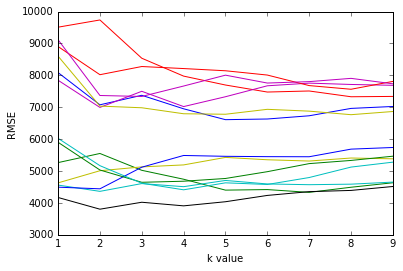

In [146]:
#Visualise the data
for k,v in final_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

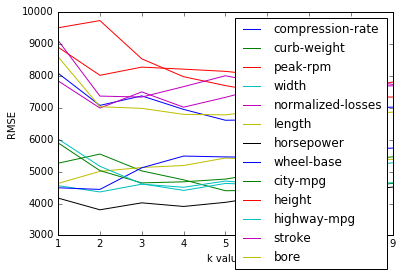

In [147]:
#To see the legend
for k,v in final_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc = 'best')

2) Multivariate Model

In [148]:
#Data is quite messy to look at as it is a nested dictionary.
#So, find the average value of the inner dictionaries (each variable)
#and sort them
avg_rmses = {}
for k,v in final_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmses[k] = avg_rmse
    
#Convert dict to series and sort to make it neater
avg_rmses2 = pd.Series(avg_rmses)
avg_rmses2.sort_values()

horsepower           4159.407396
width                4572.132690
curb-weight          4761.512348
highway-mpg          4958.747202
city-mpg             5115.129910
length               5204.957265
wheel-base           5258.832170
compression-rate     7050.480620
bore                 7071.893670
normalized-losses    7502.954656
stroke               7855.718624
height               8069.563980
peak-rpm             8124.215034
dtype: float64

Now that we have identified which features have the lowest RMSEs,
we can continue to use them for our multivariate model

In [149]:
#same as univariate but at the knn.fit and predictions line,
#only got 1 set of [] for the train and test sets,
#as there is already a list of features

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    #Radomize row orders before splitting the dataframe
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    halfway = int(len(rand_df) / 2)
    
    train_set = rand_df.iloc[0:halfway]
    test_set = rand_df.iloc[halfway:]
    
    #Test knn model with diff k values
    k_values = list(range(1,10))
    rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_col], train_set[target_col])
        predictions = knn.predict(test_set[train_col])

        #Calculate RMSE (which is a rough indicator of how good the model is)
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = np.sqrt(mse)
        
        rmses[k] = rmse
    return rmses

In [150]:
multivariate_rmse = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test(three_best_features, 'price', normalized_cars)
multivariate_rmse["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse = knn_train_test(four_best_features, 'price', normalized_cars)
multivariate_rmse["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse = knn_train_test(five_best_features, 'price', normalized_cars)
multivariate_rmse["five best features"] = rmse

list(multivariate_rmse.items())

[('five best features',
  {1: 2530.0554077602005,
   2: 2897.1757974767684,
   3: 3183.4597426217424,
   4: 3168.0230415758415,
   5: 3341.6024539726504,
   6: 3537.520542998191,
   7: 3817.290452118825,
   8: 4004.414529685573,
   9: 3992.3186041830318}),
 ('four best features',
  {1: 2516.589279950226,
   2: 2811.1727257604443,
   3: 3013.3615157930335,
   4: 3126.269482641261,
   5: 3280.3807311630976,
   6: 3479.5099401018138,
   7: 3781.5612742414464,
   8: 3988.8669577450623,
   9: 4024.998621362245}),
 ('three best features',
  {1: 3013.0109985241875,
   2: 2813.285969825997,
   3: 3171.585284478674,
   4: 3182.3137417981943,
   5: 3305.9401397969677,
   6: 3522.506848900376,
   7: 3774.3772094554106,
   8: 3978.969124021116,
   9: 3992.923680588881})]

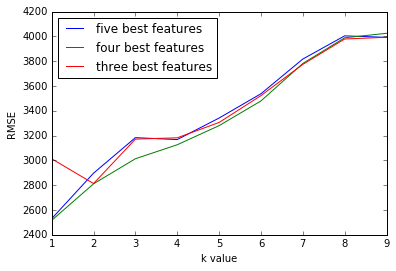

In [151]:
#Visualise the data
for k,v in multivariate_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc = 'upper left')

__Conclusion__

Comparing the univariate and multivariate models, the best univariate model has an RMSE of roughly 4000 which is worse than all the multivariate models.

Comparing the multivariate models, 4 features seems to give the lowest RMSE.

Inspecting further, a lower k value seems to give the lowest RMSE. 

Thus, it may seem that the best model is the multivariate model with 4 features using a kvalue of 1.

However, RMSE may not be the best indicator for the best model as it extremely biased towards smaller k values. 

As such, further analysis or different indicators may need to be used to obtain an even better model.